In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

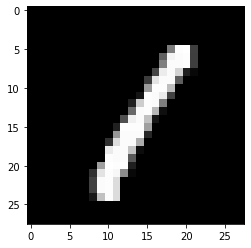

1
1
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [33]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28, 28 
batch_size = 256 
num_classes = 10
epochs = 40

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:

    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

plt.imshow(x_train[3,:].reshape((28,28)), cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.show()

x_train /= 255
x_test /= 255


print(y_train[3])

print(y_train[3])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(y_test[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

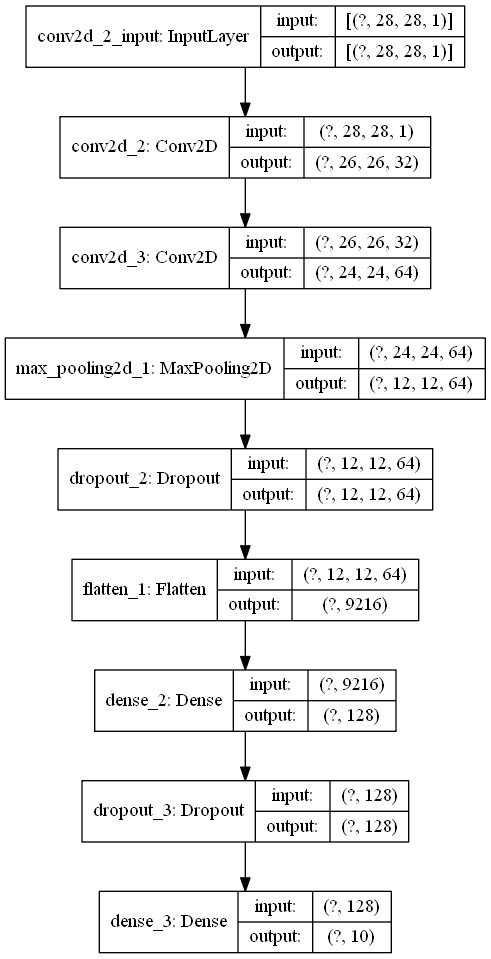

In [34]:

model = Sequential()

# Convolutional layer #1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# Convolutional layer #2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))   # Dropout feature randomly removes certain layer-to-layer connections at each weight update, improving robustness of learning.
model.add(Flatten())  # data is now in the form of a large column matrix.

# Fully connected layer #1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# Fully connected layer #2
model.add(Dense(num_classes, activation='softmax')) 



# SPECIFY THE OBJECTIVE FUNCTION TO BE MINIMIZED AND THE OPTIMIZATION ALGORITHMS TO BE USED

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])
print(model.summary())

### PICTORIAL REPRESENTATION OF THE NEURAL NETWORK ###
plot_model(model, to_file='model_summary_plot.png', show_shapes=True, show_layer_names=True)

In [35]:
### TRAIN ABOVE MODEL ON MNIST TRAINING DATASET ####
epochs = 40
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test) )


Epoch 1/40
235/235 [==============================] - 46s 198ms/step - loss: 2.2889 - accuracy: 0.1195 - val_loss: 2.2651 - val_accuracy: 0.1802
Epoch 2/40
235/235 [==============================] - 46s 197ms/step - loss: 2.2580 - accuracy: 0.1731 - val_loss: 2.2293 - val_accuracy: 0.3214
Epoch 3/40
235/235 [==============================] - 46s 197ms/step - loss: 2.2234 - accuracy: 0.2365 - val_loss: 2.1885 - val_accuracy: 0.4043
Epoch 4/40
235/235 [==============================] - 46s 196ms/step - loss: 2.1844 - accuracy: 0.2944 - val_loss: 2.1397 - val_accuracy: 0.4695
Epoch 5/40
235/235 [==============================] - 49s 209ms/step - loss: 2.1362 - accuracy: 0.3469 - val_loss: 2.0797 - val_accuracy: 0.5257
Epoch 6/40
235/235 [==============================] - 48s 203ms/step - loss: 2.0750 - accuracy: 0.3950 - val_loss: 2.0054 - val_accuracy: 0.5656
Epoch 7/40
235/235 [==============================] - 49s 207ms/step - loss: 2.0038 - accuracy: 0.4349 - val_loss: 1.9158 - val_ac

History of training accuracy:
[0.12301667034626007, 0.16111665964126587, 0.20391666889190674, 0.2523166537284851, 0.3086499869823456, 0.3546333312988281, 0.40560001134872437, 0.4436500072479248, 0.4800499975681305, 0.5059333443641663, 0.5402666926383972, 0.5618833303451538, 0.5808500051498413, 0.5995333194732666, 0.6142666935920715, 0.6284166574478149, 0.6394333243370056, 0.6538000106811523, 0.6626166701316833, 0.6765999794006348, 0.6846166849136353, 0.6930333375930786, 0.7020999789237976, 0.7093333601951599, 0.7156500220298767, 0.7199666500091553, 0.7284500002861023, 0.7337499856948853, 0.7409666776657104, 0.7474666833877563, 0.7512333393096924, 0.7578666806221008, 0.7614333629608154, 0.763949990272522, 0.7707333564758301, 0.7703999876976013, 0.776033341884613, 0.7792500257492065, 0.7837333083152771, 0.7846999764442444]
Accuracy on test set:  0.8784999847412109


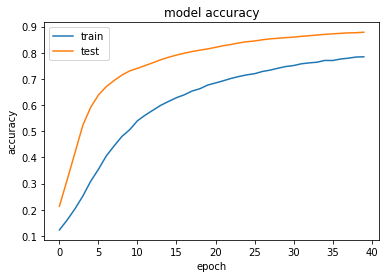

In [9]:
# USE ONLY WHEN OBJECTIVE CATEGORICAL CROSS-ENTROPY is MINIMIZED 

### PLOT THE TRAINING AND TESTING ACCURACY AS A FUNCTION OF TRAINING EPOCHS ###
print('History of training accuracy:')
print(history.history['accuracy'])

score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy on test set: ",score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



(412, 350, 3)
(412, 350)


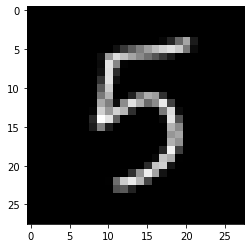

In [11]:
# IMAGE PROCESSING TO CONVERT HAND-DRAWN IMAGE TO GRAYSCALE AND SIZE 28x28  

#############   (UNCLEAN : CAN BE MADE MORE EFFICIENT, BUT THIS WORKS)     #################

import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image


img = cv2.imread('hand_5.png', cv2.IMREAD_UNCHANGED)
img_rgb = img[:, :,0:3]

print(img_rgb.shape)

# CONVERT RGBA format (4 channels) TO GRAYSCALE (1 channel)
img_gray = np.zeros(np.shape(img_rgb)[0:2])
img_gray = 0.2989*img_rgb[:,:,0] + 0.5870*img_rgb[:,:,1] +  0.1140*img_rgb[:,:,2]
print(img_gray.shape)

# CHANGE BACKGROUND FROM WHITE TO BLACK, INK FROM BLACK TO WHITE
img_gray_neg = 255.0 - img_gray

plt.imshow(img_gray_neg, cmap='gray', vmin=0, vmax=255)
# RESIZE IMAGE TO 28x28 RESOLUTION
im = Image.fromarray(img_gray_neg)
im = im.convert('RGB')
im = im.resize((28,28))
im.save("hand_5_resized.jpg")

# SHOW 28x28 image
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
im_mat = np.asarray(im)
img_mat_gray = 0.2989*im_mat[:,:,0] + 0.5870*im_mat[:,:,1] +  0.1140*im_mat[:,:,2]

In [12]:
# TEST THE GRAYSCALE IMAGE (CELL ABOVE) ON THE NEURAL NETWORK
img_for_test  = np.zeros((1,28,28,1))
img_for_test[0,:,:,0] = img_mat_gray/255.0  ### REMEMBER THE PIXEL VALUES HAVE TO LIE WITHIN 0,1
prediction = model.predict(img_for_test)

# PRINT ONE-HOT ENCODED VALUE AND LARGEST INDEX
print(prediction)
print(np.argmax(prediction))

[[0.05171201 0.01261922 0.0269006  0.21486773 0.08785704 0.27091098
  0.16935234 0.02427823 0.08298852 0.0585133 ]]
5


(829, 622, 3)
(829, 622)


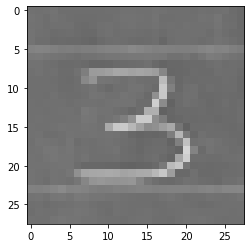

In [13]:
# IMAGE PROCESSING TO CONVERT HAND-DRAWN IMAGE TO GRAYSCALE AND SIZE 28x28  

#############   (UNCLEAN : CAN BE MADE MORE EFFICIENT, BUT THIS WORKS)     #################

import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image


img = cv2.imread('E3.jpg', cv2.IMREAD_UNCHANGED)
img_rgb = img[:, :,0:3]

print(img_rgb.shape)

# CONVERT RGBA format (4 channels) TO GRAYSCALE (1 channel)
img_gray = np.zeros(np.shape(img_rgb)[0:2])
img_gray = 0.2989*img_rgb[:,:,0] + 0.5870*img_rgb[:,:,1] +  0.1140*img_rgb[:,:,2]
print(img_gray.shape)

# CHANGE BACKGROUND FROM WHITE TO BLACK, INK FROM BLACK TO WHITE
img_gray_neg = 255.0 - img_gray

plt.imshow(img_gray_neg, cmap='gray', vmin=0, vmax=255)
# RESIZE IMAGE TO 28x28 RESOLUTION
im = Image.fromarray(img_gray_neg)
im = im.convert('RGB')
im = im.resize((28,28))
im.save("E3_resized.jpg")

# SHOW 28x28 image
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
im_mat = np.asarray(im)
img_mat_gray = 0.2989*im_mat[:,:,0] + 0.5870*im_mat[:,:,1] +  0.1140*im_mat[:,:,2]

In [14]:
# TEST THE GRAYSCALE IMAGE (CELL ABOVE) ON THE NEURAL NETWORK
img_for_test  = np.zeros((1,28,28,1))
img_for_test[0,:,:,0] = img_mat_gray/255.0  ### REMEMBER THE PIXEL VALUES HAVE TO LIE WITHIN 0,1
prediction = model.predict(img_for_test)

# PRINT ONE-HOT ENCODED VALUE AND LARGEST INDEX
print(prediction)
print(np.argmax(prediction))

[[0.05692954 0.00188354 0.35269812 0.29206696 0.0072094  0.20910352
  0.01545871 0.00445063 0.05881809 0.00138142]]
2


(528, 396, 3)
(528, 396)


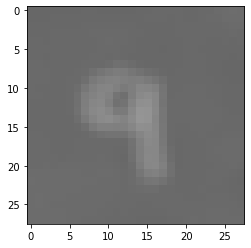

In [15]:


img = cv2.imread('IN93.jpg', cv2.IMREAD_UNCHANGED)
img_rgb = img[:, :,0:3]

print(img_rgb.shape)

# CONVERT RGBA format (4 channels) TO GRAYSCALE (1 channel)
img_gray = np.zeros(np.shape(img_rgb)[0:2])
img_gray = 0.2989*img_rgb[:,:,0] + 0.5870*img_rgb[:,:,1] +  0.1140*img_rgb[:,:,2]
print(img_gray.shape)

# CHANGE BACKGROUND FROM WHITE TO BLACK, INK FROM BLACK TO WHITE
img_gray_neg = 255.0 - img_gray

plt.imshow(img_gray_neg, cmap='gray', vmin=0, vmax=255)
# RESIZE IMAGE TO 28x28 RESOLUTION
im = Image.fromarray(img_gray_neg)
im = im.convert('RGB')
im = im.resize((28,28))
im.save("IN93_resized.jpg")

# SHOW 28x28 image
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
im_mat = np.asarray(im)
img_mat_gray = 0.2989*im_mat[:,:,0] + 0.5870*im_mat[:,:,1] +  0.1140*im_mat[:,:,2]

In [16]:
# TEST THE GRAYSCALE IMAGE (CELL ABOVE) ON THE NEURAL NETWORK
img_for_test  = np.zeros((1,28,28,1))
img_for_test[0,:,:,0] = img_mat_gray/255.0  ### REMEMBER THE PIXEL VALUES HAVE TO LIE WITHIN 0,1
prediction = model.predict(img_for_test)

# PRINT ONE-HOT ENCODED VALUE AND LARGEST INDEX
print(prediction)
print(np.argmax(prediction))

[[0.08368714 0.00394492 0.29115453 0.18551642 0.02697952 0.25975594
  0.03976742 0.01204915 0.09197839 0.00516664]]
2


(480, 640, 3)
(480, 640)


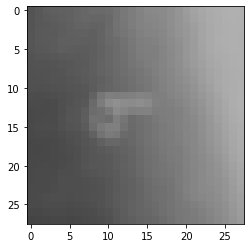

In [17]:


img = cv2.imread('I9.jpg', cv2.IMREAD_UNCHANGED)
img_rgb = img[:, :,0:3]

print(img_rgb.shape)

# CONVERT RGBA format (4 channels) TO GRAYSCALE (1 channel)
img_gray = np.zeros(np.shape(img_rgb)[0:2])
img_gray = 0.2989*img_rgb[:,:,0] + 0.5870*img_rgb[:,:,1] +  0.1140*img_rgb[:,:,2]
print(img_gray.shape)

# CHANGE BACKGROUND FROM WHITE TO BLACK, INK FROM BLACK TO WHITE
img_gray_neg = 255.0 - img_gray

plt.imshow(img_gray_neg, cmap='gray', vmin=0, vmax=255)
# RESIZE IMAGE TO 28x28 RESOLUTION
im = Image.fromarray(img_gray_neg)
im = im.convert('RGB')
im = im.resize((28,28))
im.save("I9_resized.jpg")

# SHOW 28x28 image
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
im_mat = np.asarray(im)
img_mat_gray = 0.2989*im_mat[:,:,0] + 0.5870*im_mat[:,:,1] +  0.1140*im_mat[:,:,2]

In [18]:
# TEST THE GRAYSCALE IMAGE (CELL ABOVE) ON THE NEURAL NETWORK
img_for_test  = np.zeros((1,28,28,1))
img_for_test[0,:,:,0] = img_mat_gray/255.0  ### REMEMBER THE PIXEL VALUES HAVE TO LIE WITHIN 0,1
prediction = model.predict(img_for_test)

# PRINT ONE-HOT ENCODED VALUE AND LARGEST INDEX
print(prediction)
print(np.argmax(prediction))

[[0.13436148 0.00347137 0.29313302 0.08141153 0.02382172 0.2846487
  0.04831481 0.00469869 0.12429551 0.00184306]]
2


(528, 396, 3)
(528, 396)


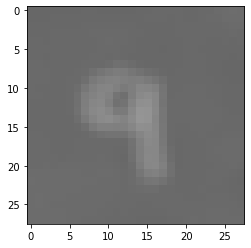

In [19]:


img = cv2.imread('IN93.jpg', cv2.IMREAD_UNCHANGED)
img_rgb = img[:, :,0:3]

print(img_rgb.shape)

# CONVERT RGBA format (4 channels) TO GRAYSCALE (1 channel)
img_gray = np.zeros(np.shape(img_rgb)[0:2])
img_gray = 0.2989*img_rgb[:,:,0] + 0.5870*img_rgb[:,:,1] +  0.1140*img_rgb[:,:,2]
print(img_gray.shape)

# CHANGE BACKGROUND FROM WHITE TO BLACK, INK FROM BLACK TO WHITE
img_gray_neg = 255.0 - img_gray

plt.imshow(img_gray_neg, cmap='gray', vmin=0, vmax=255)
# RESIZE IMAGE TO 28x28 RESOLUTION
im = Image.fromarray(img_gray_neg)
im = im.convert('RGB')
im = im.resize((28,28))
im.save("I9_resized.jpg")

# SHOW 28x28 image
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
im_mat = np.asarray(im)
img_mat_gray = 0.2989*im_mat[:,:,0] + 0.5870*im_mat[:,:,1] +  0.1140*im_mat[:,:,2]

In [20]:
# TEST THE GRAYSCALE IMAGE (CELL ABOVE) ON THE NEURAL NETWORK
img_for_test  = np.zeros((1,28,28,1))
img_for_test[0,:,:,0] = img_mat_gray/255.0  ### REMEMBER THE PIXEL VALUES HAVE TO LIE WITHIN 0,1
prediction = model.predict(img_for_test)

# PRINT ONE-HOT ENCODED VALUE AND LARGEST INDEX
print(prediction)
print(np.argmax(prediction))

[[0.08368714 0.00394492 0.29115453 0.18551642 0.02697952 0.25975594
  0.03976742 0.01204915 0.09197839 0.00516664]]
2


(556, 417, 3)
(556, 417)


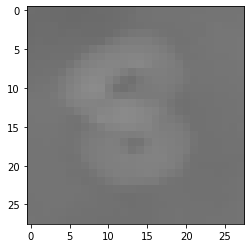

In [21]:


img = cv2.imread('I8.jpg', cv2.IMREAD_UNCHANGED)
img_rgb = img[:, :,0:3]

print(img_rgb.shape)

# CONVERT RGBA format (4 channels) TO GRAYSCALE (1 channel)
img_gray = np.zeros(np.shape(img_rgb)[0:2])
img_gray = 0.2989*img_rgb[:,:,0] + 0.5870*img_rgb[:,:,1] +  0.1140*img_rgb[:,:,2]
print(img_gray.shape)

# CHANGE BACKGROUND FROM WHITE TO BLACK, INK FROM BLACK TO WHITE
img_gray_neg = 255.0 - img_gray

plt.imshow(img_gray_neg, cmap='gray', vmin=0, vmax=255)
# RESIZE IMAGE TO 28x28 RESOLUTION
im = Image.fromarray(img_gray_neg)
im = im.convert('RGB')
im = im.resize((28,28))
im.save("I8_resized.jpg")

# SHOW 28x28 image
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
im_mat = np.asarray(im)
img_mat_gray = 0.2989*im_mat[:,:,0] + 0.5870*im_mat[:,:,1] +  0.1140*im_mat[:,:,2]

In [22]:
# TEST THE GRAYSCALE IMAGE (CELL ABOVE) ON THE NEURAL NETWORK
img_for_test  = np.zeros((1,28,28,1))
img_for_test[0,:,:,0] = img_mat_gray/255.0  ### REMEMBER THE PIXEL VALUES HAVE TO LIE WITHIN 0,1
prediction = model.predict(img_for_test)

# PRINT ONE-HOT ENCODED VALUE AND LARGEST INDEX
print(prediction)
print(np.argmax(prediction))

[[0.10270415 0.00196953 0.37419254 0.16628432 0.01224767 0.22246493
  0.02781836 0.00727701 0.08284785 0.00219365]]
2


(556, 417, 3)
(556, 417)


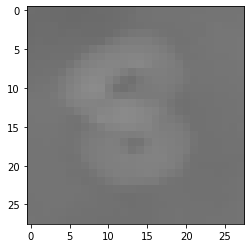

In [23]:


img = cv2.imread('IN8.jpg', cv2.IMREAD_UNCHANGED)
img_rgb = img[:, :,0:3]

print(img_rgb.shape)

# CONVERT RGBA format (4 channels) TO GRAYSCALE (1 channel)
img_gray = np.zeros(np.shape(img_rgb)[0:2])
img_gray = 0.2989*img_rgb[:,:,0] + 0.5870*img_rgb[:,:,1] +  0.1140*img_rgb[:,:,2]
print(img_gray.shape)

# CHANGE BACKGROUND FROM WHITE TO BLACK, INK FROM BLACK TO WHITE
img_gray_neg = 255.0 - img_gray

plt.imshow(img_gray_neg, cmap='gray', vmin=0, vmax=255)
# RESIZE IMAGE TO 28x28 RESOLUTION
im = Image.fromarray(img_gray_neg)
im = im.convert('RGB')
im = im.resize((28,28))
im.save("I8_resized.jpg")

# SHOW 28x28 image
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
im_mat = np.asarray(im)
img_mat_gray = 0.2989*im_mat[:,:,0] + 0.5870*im_mat[:,:,1] +  0.1140*im_mat[:,:,2]

In [24]:
# TEST THE GRAYSCALE IMAGE (CELL ABOVE) ON THE NEURAL NETWORK
img_for_test  = np.zeros((1,28,28,1))
img_for_test[0,:,:,0] = img_mat_gray/255.0  ### REMEMBER THE PIXEL VALUES HAVE TO LIE WITHIN 0,1
prediction = model.predict(img_for_test)

# PRINT ONE-HOT ENCODED VALUE AND LARGEST INDEX
print(prediction)
print(np.argmax(prediction))

[[0.10270415 0.00196953 0.37419254 0.16628432 0.01224767 0.22246493
  0.02781836 0.00727701 0.08284785 0.00219365]]
2


(1100, 825, 3)
(1100, 825)


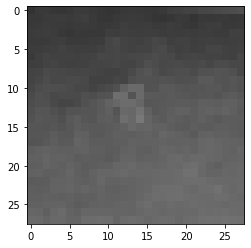

In [25]:


img = cv2.imread('E8.jpg', cv2.IMREAD_UNCHANGED)
img_rgb = img[:, :,0:3]

print(img_rgb.shape)

# CONVERT RGBA format (4 channels) TO GRAYSCALE (1 channel)
img_gray = np.zeros(np.shape(img_rgb)[0:2])
img_gray = 0.2989*img_rgb[:,:,0] + 0.5870*img_rgb[:,:,1] +  0.1140*img_rgb[:,:,2]
print(img_gray.shape)

# CHANGE BACKGROUND FROM WHITE TO BLACK, INK FROM BLACK TO WHITE
img_gray_neg = 255.0 - img_gray

plt.imshow(img_gray_neg, cmap='gray', vmin=0, vmax=255)
# RESIZE IMAGE TO 28x28 RESOLUTION
im = Image.fromarray(img_gray_neg)
im = im.convert('RGB')
im = im.resize((28,28))
im.save("E8_resized.jpg")

# SHOW 28x28 image
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
im_mat = np.asarray(im)
img_mat_gray = 0.2989*im_mat[:,:,0] + 0.5870*im_mat[:,:,1] +  0.1140*im_mat[:,:,2]

In [26]:
# TEST THE GRAYSCALE IMAGE (CELL ABOVE) ON THE NEURAL NETWORK
img_for_test  = np.zeros((1,28,28,1))
img_for_test[0,:,:,0] = img_mat_gray/255.0  ### REMEMBER THE PIXEL VALUES HAVE TO LIE WITHIN 0,1
prediction = model.predict(img_for_test)

# PRINT ONE-HOT ENCODED VALUE AND LARGEST INDEX
print(prediction)
print(np.argmax(prediction))

[[0.1314937  0.00741226 0.27700096 0.18754655 0.02484557 0.22291237
  0.0357932  0.01212053 0.09384356 0.00703127]]
2


(220, 165, 3)
(220, 165)


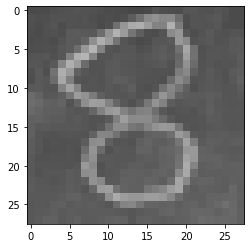

In [27]:


img = cv2.imread('EB8.jpg', cv2.IMREAD_UNCHANGED)
img_rgb = img[:, :,0:3]

print(img_rgb.shape)

# CONVERT RGBA format (4 channels) TO GRAYSCALE (1 channel)
img_gray = np.zeros(np.shape(img_rgb)[0:2])
img_gray = 0.2989*img_rgb[:,:,0] + 0.5870*img_rgb[:,:,1] +  0.1140*img_rgb[:,:,2]
print(img_gray.shape)

# CHANGE BACKGROUND FROM WHITE TO BLACK, INK FROM BLACK TO WHITE
img_gray_neg = 255.0 - img_gray

plt.imshow(img_gray_neg, cmap='gray', vmin=0, vmax=255)
# RESIZE IMAGE TO 28x28 RESOLUTION
im = Image.fromarray(img_gray_neg)
im = im.convert('RGB')
im = im.resize((28,28))
im.save("EB8_resized.jpg")

# SHOW 28x28 image
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
im_mat = np.asarray(im)
img_mat_gray = 0.2989*im_mat[:,:,0] + 0.5870*im_mat[:,:,1] +  0.1140*im_mat[:,:,2]

In [28]:
# TEST THE GRAYSCALE IMAGE (CELL ABOVE) ON THE NEURAL NETWORK
img_for_test  = np.zeros((1,28,28,1))
img_for_test[0,:,:,0] = img_mat_gray/255.0  ### REMEMBER THE PIXEL VALUES HAVE TO LIE WITHIN 0,1
prediction = model.predict(img_for_test)

# PRINT ONE-HOT ENCODED VALUE AND LARGEST INDEX
print(prediction)
print(np.argmax(prediction))

[[0.06101754 0.00238047 0.35301203 0.253338   0.01561252 0.2083837
  0.02068913 0.00719781 0.07615444 0.00221439]]
2


(457, 343, 3)
(457, 343)


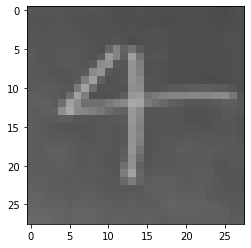

In [29]:


img = cv2.imread('E4.jpg', cv2.IMREAD_UNCHANGED)
img_rgb = img[:, :,0:3]

print(img_rgb.shape)

# CONVERT RGBA format (4 channels) TO GRAYSCALE (1 channel)
img_gray = np.zeros(np.shape(img_rgb)[0:2])
img_gray = 0.2989*img_rgb[:,:,0] + 0.5870*img_rgb[:,:,1] +  0.1140*img_rgb[:,:,2]
print(img_gray.shape)

# CHANGE BACKGROUND FROM WHITE TO BLACK, INK FROM BLACK TO WHITE
img_gray_neg = 255.0 - img_gray

plt.imshow(img_gray_neg, cmap='gray', vmin=0, vmax=255)
# RESIZE IMAGE TO 28x28 RESOLUTION
im = Image.fromarray(img_gray_neg)
im = im.convert('RGB')
im = im.resize((28,28))
im.save("E4_resized.jpg")

# SHOW 28x28 image
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
im_mat = np.asarray(im)
img_mat_gray = 0.2989*im_mat[:,:,0] + 0.5870*im_mat[:,:,1] +  0.1140*im_mat[:,:,2]

In [30]:
# TEST THE GRAYSCALE IMAGE (CELL ABOVE) ON THE NEURAL NETWORK
img_for_test  = np.zeros((1,28,28,1))
img_for_test[0,:,:,0] = img_mat_gray/255.0  ### REMEMBER THE PIXEL VALUES HAVE TO LIE WITHIN 0,1
prediction = model.predict(img_for_test)

# PRINT ONE-HOT ENCODED VALUE AND LARGEST INDEX
print(prediction)
print(np.argmax(prediction))

[[0.09610409 0.00961271 0.23204501 0.19255278 0.02361361 0.22415242
  0.0370087  0.02503056 0.15094511 0.00893514]]
2


(679, 509, 3)
(679, 509)


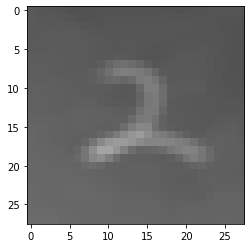

In [31]:


img = cv2.imread('E2.jpg', cv2.IMREAD_UNCHANGED)
img_rgb = img[:, :,0:3]

print(img_rgb.shape)

# CONVERT RGBA format (4 channels) TO GRAYSCALE (1 channel)
img_gray = np.zeros(np.shape(img_rgb)[0:2])
img_gray = 0.2989*img_rgb[:,:,0] + 0.5870*img_rgb[:,:,1] +  0.1140*img_rgb[:,:,2]
print(img_gray.shape)

# CHANGE BACKGROUND FROM WHITE TO BLACK, INK FROM BLACK TO WHITE
img_gray_neg = 255.0 - img_gray

plt.imshow(img_gray_neg, cmap='gray', vmin=0, vmax=255)
# RESIZE IMAGE TO 28x28 RESOLUTION
im = Image.fromarray(img_gray_neg)
im = im.convert('RGB')
im = im.resize((28,28))
im.save("E2_resized.jpg")

# SHOW 28x28 image
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
im_mat = np.asarray(im)
img_mat_gray = 0.2989*im_mat[:,:,0] + 0.5870*im_mat[:,:,1] +  0.1140*im_mat[:,:,2]

In [32]:
# TEST THE GRAYSCALE IMAGE (CELL ABOVE) ON THE NEURAL NETWORK
img_for_test  = np.zeros((1,28,28,1))
img_for_test[0,:,:,0] = img_mat_gray/255.0  ### REMEMBER THE PIXEL VALUES HAVE TO LIE WITHIN 0,1
prediction = model.predict(img_for_test)

# PRINT ONE-HOT ENCODED VALUE AND LARGEST INDEX
print(prediction)
print(np.argmax(prediction))

[[0.06880767 0.00508766 0.52072865 0.1202023  0.0177053  0.1343072
  0.03945011 0.00917011 0.08022582 0.00431514]]
2
